In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load Breast Cancer dataset
breast = datasets.load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(breast.data, breast.target, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca)
print(X_test_pca)

[[ 4.24490333e+00  9.13142795e+00]
 [ 9.05375518e+00  4.75309554e-01]
 [-2.27537401e+00  3.27847097e+00]
 [-2.51045303e+00  7.43742636e-01]
 [-2.30284792e+00  2.66515505e+00]
 [ 4.13994739e+00  2.91476361e+00]
 [ 2.99560854e+00  4.20447521e+00]
 [-3.21149460e+00 -3.73153521e-01]
 [-2.37592825e+00  3.33787948e-02]
 [ 3.38983726e+00 -2.36510231e+00]
 [-8.93881293e-01  9.60683891e-01]
 [ 4.33032435e+00 -4.03761003e+00]
 [ 3.18617027e+00  1.47231956e+00]
 [-2.63966718e+00  1.46297451e+00]
 [-3.11866687e+00 -1.43889514e+00]
 [ 5.00491144e+00 -1.16856216e+00]
 [ 9.21099216e+00  1.75576089e+00]
 [ 5.97157908e+00  3.48794503e+00]
 [-2.78508674e+00 -2.43552252e+00]
 [-3.28557710e+00 -4.26562359e-02]
 [-2.05551632e+00 -2.42605467e+00]
 [ 4.78576830e+00  3.19275729e+00]
 [-4.50204054e-01  1.30156054e-01]
 [-2.18628605e+00  2.04858538e+00]
 [ 1.27513923e+00  9.60721028e-01]
 [ 1.32979815e+00  3.38273805e-01]
 [-2.85993246e+00  3.92298101e-01]
 [ 4.93834065e+00 -4.12556719e+00]
 [-3.59004836e+00  7

In [5]:
# Train a perceptron model
ppn = Perceptron(max_iter=10000, tol=1e-4, eta0=0.1, n_jobs=-1, random_state=8)
ppn.fit(X_train_pca, y_train)

# show the weights w and fraction alpha
print('Weights: %s' % ppn.coef_)
print('Fraction alpha: %s' % ppn.intercept_)

Weights: [[-1.32558042 -0.14673795]]
Fraction alpha: [0.2]


In [6]:
# Number of misclassified samples
y_pred = ppn.predict(X_test_pca)
print('Misclassified %d' % (y_test != y_pred).sum())

Misclassified 6


In [7]:
# Accuracy score
print('Accuracy score %.2f' % accuracy_score(y_test, y_pred))

Accuracy score 0.95


In [8]:
# Plot linear classifiers for breast dataset
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'cyan', 'gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=ppn.intercept_[0], cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

<ipython-input-8-1379cdf00d0e>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


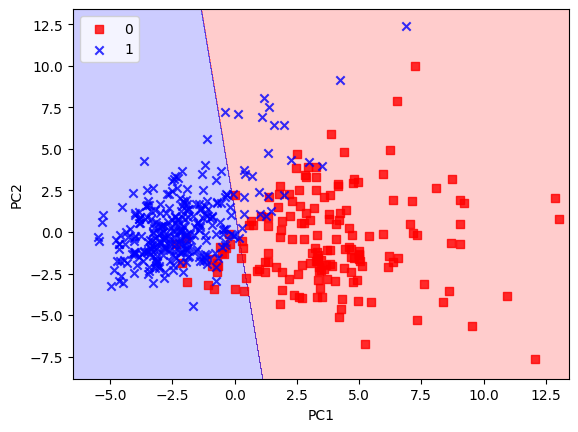

In [9]:
plot_decision_regions(X_train_pca, y_train, classifier=ppn)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()

Confusion matrix:
 [[40  3]
 [ 3 68]]


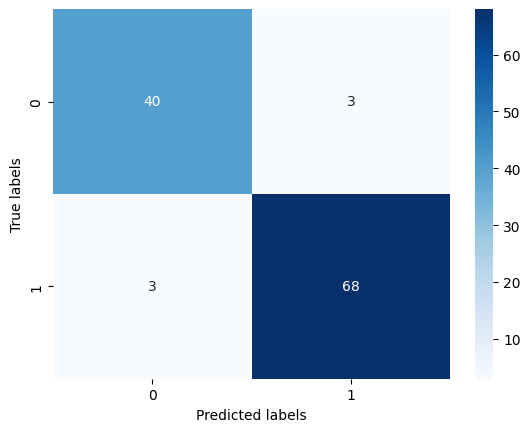

Precision: 0.947
Recall: 0.947
F1-score: 0.947
Sensitivity: 0.944
Specificity: 0.947
Accuracy score 0.947


In [10]:
# all test
# confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
# heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# precision, recall, f1-score, sensitivity, specificity
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('F1-score: %.3f' % f1_score(y_test, y_pred, average='micro'))
print('Sensitivity: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('Specificity: %.3f' % recall_score(y_test, y_pred, average='weighted'))
# Accuracy score
print('Accuracy score %.3f' % accuracy_score(y_test, y_pred))

[]
[array([-0.15367613, -0.53175931, -0.13165319, -0.12295621, -0.10750849,
       -0.04188168, -0.2174636 , -0.18617392, -0.04043633,  0.04017807,
       -0.42516183, -0.12545953, -0.23376769, -0.27561536,  0.02666306,
       -0.32187209, -0.23955798, -0.12611552, -0.49715966, -0.00988082,
       -0.31710083, -0.79820248, -0.24681695, -0.25070615, -0.50507482,
       -0.36275022, -0.4646368 , -0.27188349, -0.6673805 , -0.33073477]), array([-0.34200221, -0.67936945, -0.32176813, -0.30606296, -0.1908874 ,
        0.02795378, -0.25344545, -0.46290731,  0.16535855,  0.43331565,
       -0.66018546,  0.14948237, -0.31588804, -0.48444546, -0.42188506,
        0.07555622,  0.47320926, -0.15798609,  0.26584669,  0.37869355,
       -0.4989663 , -0.9479567 , -0.41999032, -0.42015336, -0.69581207,
       -0.34266367, -0.25339894, -0.41593369, -0.50443142,  0.00967176]), array([-0.26272538, -0.43601729, -0.24286393, -0.23755414, -0.17010755,
       -0.10884485, -0.39342944, -0.49215634, -0.0043608

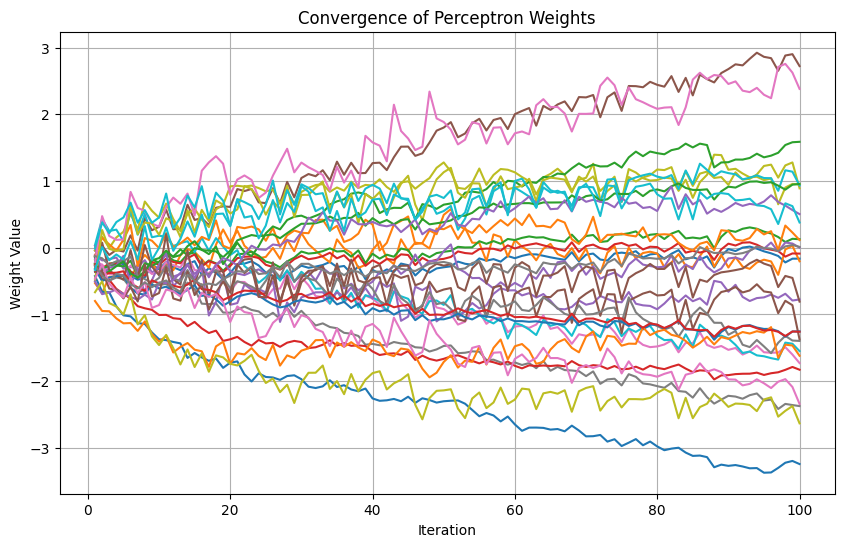

In [11]:
# Train a perceptron model with added convergence tracking
ppn = Perceptron(max_iter=100, tol=1e-4, eta0=0.1, n_jobs=-1, random_state=8, warm_start=True)

weights_history = []  # To store the weights at each iteration

print(weights_history)

for _ in range(ppn.max_iter):
    ppn.partial_fit(X_train_std, y_train, classes=np.unique(y_train))
    weights_history.append(ppn.coef_.ravel().copy())

print(weights_history)

# Convert the list of weights into a numpy array for easy manipulation
weights_history = np.array(weights_history)

print(weights_history)
# Plot the convergence of weights
plt.figure(figsize=(10, 6))
for i in range(weights_history.shape[1]):
    plt.plot(range(1, ppn.max_iter + 1), weights_history[:, i], label=f'Weight {i + 1}')

plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Convergence of Perceptron Weights')
#plt.legend()
plt.grid(True)
plt.show()